# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
from api_keys import (weather_api_key, g_key)
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
import json


## Generate Cities List

In [28]:
cities = []
lat_lng = []

cities = []
lat_lng = []

#Create the list by creating a set of random lat and lng combinations
lat = np.random.uniform(low=-90.00, high=90.00, size=1500)
lng = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lng = zip(lat, lng)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add new city names, and skip if already in the list 
    if city not in cities:
        cities.append(city)

#Print the city count
#The number will always be different due the list being randomly generated everytime
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [91]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key

In [35]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0 

#Create a for loop to go through data and fill the lists

for city in cities:
    response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_name.append(weather_json["city"]["name"])
        lat.append(weather_json["city"]["coord"]["lat"])
        lng.append(weather_json["city"]["coord"]["lon"])
        max_temp.append(weather_json["list"][0]["main"]["temp_max"])
        humidity.append(weather_json["list"][0]["main"]["humidity"])
        cloudiness.append(weather_json["list"][0]["clouds"]["all"])
        wind_speed.append(weather_json["list"][0]["wind"]["speed"])
        country.append(weather_json["city"]["country"])
        date.append(weather_json["list"][0]["dt"])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("No Record Found") 
        pass
        
print("---------------")
print("Data Retrieval Complete")
print("---------------")

Processing record 1 of Set 1 | nikolskoye
Processing record 2 of Set 1 | los llanos de aridane
Processing record 3 of Set 1 | mataura
Processing record 4 of Set 1 | asau
Processing record 5 of Set 1 | tautira
Processing record 6 of Set 1 | kaabong
Processing record 7 of Set 1 | new norfolk
Processing record 8 of Set 1 | rodrigues alves
Processing record 9 of Set 1 | pevek
Processing record 10 of Set 1 | mar del plata
Processing record 11 of Set 1 | pisco
Processing record 12 of Set 1 | tasiilaq
Processing record 13 of Set 1 | grindavik
Processing record 14 of Set 1 | east london
Processing record 15 of Set 1 | thompson
Processing record 16 of Set 1 | kodiak
Processing record 17 of Set 1 | rikitea
Processing record 18 of Set 1 | bo phloi
Processing record 19 of Set 1 | bredasdorp
Processing record 20 of Set 1 | moberly
Processing record 21 of Set 1 | yambio
Processing record 22 of Set 1 | kapaa
Processing record 23 of Set 1 | ilulissat
Processing record 24 of Set 1 | atuona
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp,
                           "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
                           "Country": country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,52.14,88,7,6.38,RU,1600117200
1,Los Llanos de Aridane,28.6585,-17.9182,71.60,79,69,9.84,ES,1600117200
2,Mataura,-46.1927,168.8643,43.56,86,57,6.17,NZ,1600117200
3,Asău,46.4333,26.4000,61.23,84,1,3.49,RO,1600117200
4,Tautira,-17.7333,-149.1500,80.47,70,10,10.20,PF,1600117200


In [89]:
weather_df.to_csv('my_weather.csv')
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,20.628486,11.733796,66.925863,68.983302,51.046382,8.299332,1.600117e+09
std,33.747341,89.304152,15.707971,20.859900,36.129359,5.443131,0.000000e+00
min,-54.800000,-179.166700,29.790000,9.000000,0.000000,0.430000,1.600117e+09
25%,-7.725800,-66.060400,54.040000,58.000000,15.000000,4.230000,1.600117e+09
50%,22.933300,15.159400,68.950000,75.000000,53.000000,7.430000,1.600117e+09
75%,49.770650,86.162350,78.800000,86.000000,87.000000,10.915000,1.600117e+09
max,78.218600,178.416700,106.720000,99.000000,100.000000,29.280000,1.600117e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [41]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#humid_100 = weather_df[weather_df["Humidity"] == 100].index
#clean_city_data = weather_df.drop(humid_100, inplace=False

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

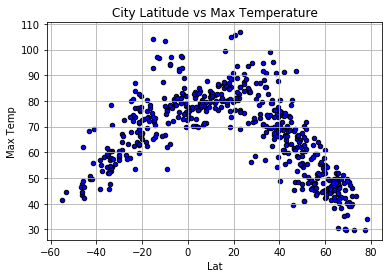

In [46]:
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", title = "City Latitude vs Max Temperature",
                                color = "blue", edgecolor = "black", grid = True)

## Latitude vs. Humidity Plot

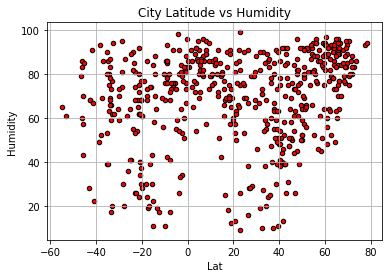

In [47]:
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity", title = "City Latitude vs Humidity",
                                color = "red", edgecolor = "black", grid = True)

## Latitude vs. Cloudiness Plot

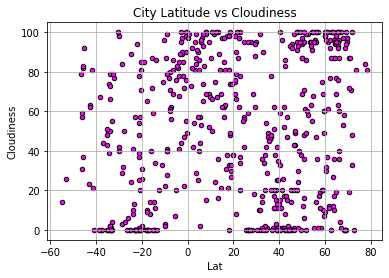

In [48]:
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", title = "City Latitude vs Cloudiness",
                                color = "magenta", edgecolor = "black", grid = True)

## Latitude vs. Wind Speed Plot

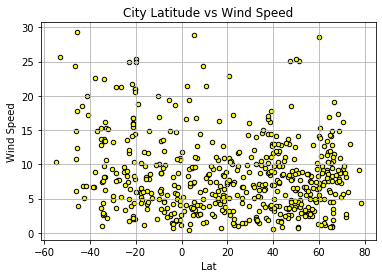

In [49]:
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", title = "City Latitude vs Wind Speed",
                                color = "yellow", edgecolor = "black", grid = True)
                                

## Linear Regression

In [52]:
northern = weather_df.loc[weather_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6780451632165287


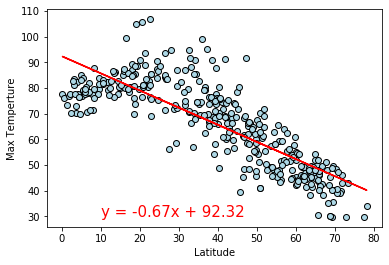

In [65]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_vs_temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5869443518320807


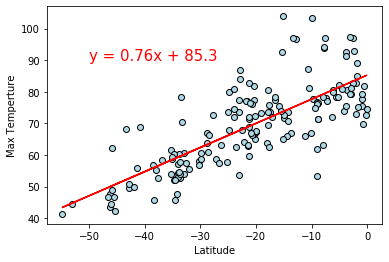

In [68]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_vs_temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016607306474023243


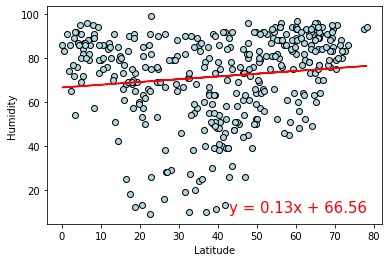

In [69]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(43,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_vs_humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0011306546974357062


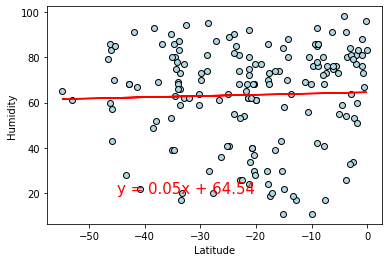

In [70]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_vs_humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007726318926473672


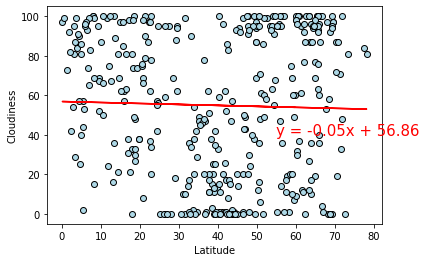

In [80]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_vs_Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0744682786239388


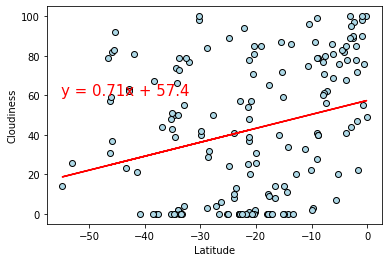

In [82]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_vs_Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006354094015767309


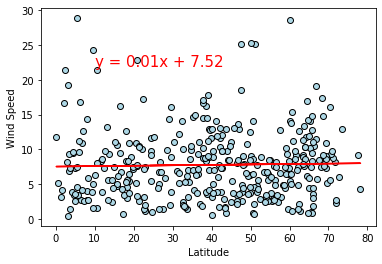

In [83]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_vs_Windspeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09995930717289575


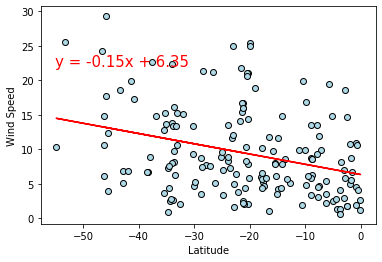

In [84]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_vs_Windspeed")
plt.show()